# k-nächste-Nachbarn
## Datensatz : EngyTime

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

import numpy as np
import seaborn as sn

import matplotlib.pyplot as plt

In [21]:
# Laden des Datensatzes
features = open("data/EngyTime.lrn", "r")
labels = open("data/EngyTime.cls", "r")

## Datenvorverarbeitung

In [22]:
# Daten Vorverarbeiten (All files are ASCII text files)
def prepo(features, labels):
    X=[]
    Y=[]
    
    for x in features:
        X.append(x.split("\t"))
    for y in labels:
        Y.append(y.split("\t"))
    
    # Convert from string
    X = np.array(X[4:]).astype(float)
    Y = np.array(Y[1:]).astype(float)
    
    # Remove the first rows
    X = np.delete(X, 0, 1)
    Y = np.delete(Y, 0, 1)
    
    
    return X, Y.reshape(len(Y))

In [23]:
X_engy, Y_engy = prepo(features, labels)

In [24]:
print("X =", X_engy.shape)

X_engy

X = (4096, 2)


array([[ 1.388261,  2.076096],
       [ 2.177247,  3.102304],
       [ 0.378645,  5.30761 ],
       ...,
       [ 1.078797,  1.526153],
       [ 1.974889, -0.649343],
       [-0.127192, -0.763974]])

In [25]:
print("Y =", Y_engy.shape)

Y_engy.reshape((len(Y_engy), 1))

Y = (4096,)


array([[1.],
       [1.],
       [1.],
       ...,
       [2.],
       [2.],
       [2.]])

In [26]:
# Split into Train- and Testdata
X_train, X_test, Y_train, Y_test = train_test_split(X_engy, Y_engy,
                                                    test_size=0.5,
                                                    random_state=0) 

print("EngyTime:\tX=", X_engy.shape,"\tY=", Y_engy.shape)
print("Train data:\tX=", X_train.shape,"\tY=", Y_train.shape)
print("Test data:\tX=", X_test.shape,"\tY=", Y_test.shape)

EngyTime:	X= (4096, 2) 	Y= (4096,)
Train data:	X= (2048, 2) 	Y= (2048,)
Test data:	X= (2048, 2) 	Y= (2048,)


## Datenvisualisierung

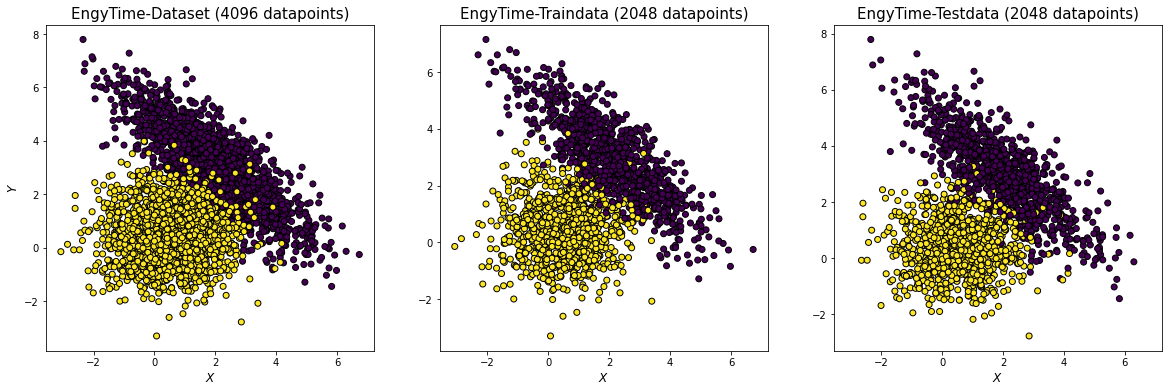

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 6))
ax0, ax1, ax2 = axes.flatten()

ax0.scatter(X_engy[:, 0], X_engy[:, 1], 
            c=Y_engy, edgecolor="black")
ax0.set_ylabel("$Y$", size=12)
ax0.set_xlabel("$X$", size=12)
ax0.set_title("EngyTime-Dataset ({} datapoints)".format(len(X_engy)), size=15)

ax1.scatter(X_train[:, 0], X_train[:, 1], 
            c=Y_train, edgecolor="black")
ax1.set_xlabel("$X$", size=12)
ax1.set_title("EngyTime-Traindata ({} datapoints)".format(len(X_train)), size=15)

ax2.scatter(X_test[:, 0], X_test[:, 1], 
            c=Y_test, edgecolor="black")
ax2.set_xlabel("$X$", size=12)
ax2.set_title("EngyTime-Testdata ({} datapoints)".format(len(X_test)), size=15)

plt.show()

## Der Algorithmus

In [28]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=100)

In [29]:
Y_pred = knn.predict(X_test)

Y_pred.reshape((len(Y_pred), 1))

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [2.],
       [1.]])

## Die Auswertung

In [30]:
def get_decision_boundary(X_test, model):
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    return xx, yy, Z

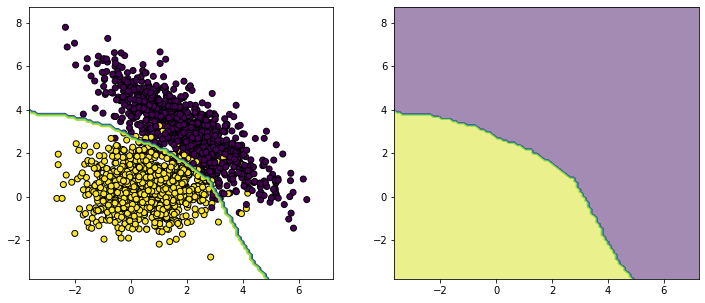

In [31]:
# Visualisation
xx, yy , Z = get_decision_boundary(X_test, knn)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(12, 5))
ax0, ax1 = axes.flatten()

ax0.contour(xx, yy, Z, alpha=1, linewidths=1.6)
ax0.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolor="k")

ax1.contourf(xx, yy, Z, alpha=0.5)
plt.show()

## Auswertung binärer Klassifikatoren
$$ accuracy = \frac{TP+TN}{TP+TN+TP+FN}$$


$$ precision = \frac{TP}{TP+FP}$$


$$ recall = \frac{TP}{TP+FN}$$

In [32]:
print("accuracy = {:.4f}".format(knn.score(X_test, Y_test)))
print("precision = {:.4f}".format(precision_score(Y_test, Y_pred)))
print("recall = {:.4f}".format(recall_score(Y_test, Y_pred)))

accuracy = 0.9663
precision = 0.9632
recall = 0.9715


In [33]:
# Confusion matrix
labels_data = ["purple", "yellow"]
cm = confusion_matrix(Y_test, Y_pred)

labels_general = ["Positive $+$", "Negative $-$"]
annot = np.array([["True Positive (TP)", "False Negative (FN)"],
                  ["False Positive (FP) ", "True Negative (TN)"]])

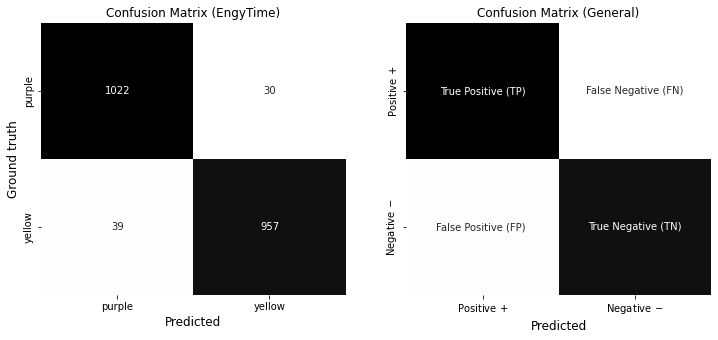

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax0, ax1 = axes.flatten()

sn.heatmap(cm, cmap="binary", ax=ax0, annot=True, fmt="d", cbar=False,
                yticklabels=labels_data, xticklabels=labels_data)
ax0.set_xlabel("Predicted", size=12)
ax0.set_ylabel("Ground truth", size=12)
ax0.set_title("Confusion Matrix (EngyTime)")

sn.heatmap(cm, cmap="binary", fmt='', ax=ax1, annot=annot, cbar=False,
               yticklabels=labels_general, xticklabels=labels_general)
ax1.set_xlabel("Predicted", size=12)
ax1.set_title("Confusion Matrix (General)")
plt.show()